In [1]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams as rc
rc['grid.linewidth']=0


In [2]:
xyz=np.load('./test_out/traj_test_T120_F0_Ta1_Esoft5_R050_G2676_blocksize100_kb5.0_dt0.001_positions.npy')
print(xyz.shape)

(50, 2676, 3)


In [3]:
%matplotlib ipympl
fig = plt.figure()
ax = fig.add_axes([0,0,2,2],projection='3d')
# ax = fig.add_axes([0,0,1,1],)
# quiver = ax.quiver([],[],[],[])
#quiver = ax.quiver([],[],[],[],[],[])
R0=50
N=100

ax.scatter(xyz[0,:N,0],xyz[0,:N,1],xyz[0,:N,2],'o',color='C0')
ax.scatter(xyz[0,N:,0],xyz[0,N:,1],xyz[0,N:,2],'o',color='C1')

def update(ii):
    fig.clear()
    ax = fig.add_axes([0,0,1,1],projection='3d')
    # ax = fig.add_axes([0,0,1,1],)

    p=xyz[ii]
    # print(p.shape)
    # line.set_data(p[:,0],p[:,1])
    # line.set_3d_properties(p[:,2])
    # plt.draw()
    # ax.plot(p[10:13,0],p[10:13,1],p[10:13,2],'o',color='C0',alpha=1)
    # ax.scatter(p[:N,0],p[:N,1],p[:N,2],'o',color='C0',alpha=0.5)
    ax.plot(p[:,0],p[:,1],p[:,2],'-',color='C0')
    # ax.plot(p[300:303,0],p[300:303,1],p[300:303,2],'o',color='C1',alpha=1)
    # ax.scatter(p[N:,0],p[N:,1],p[N:,2],'o',color='C1',alpha=0.5)
    # ax.plot(masked_xyz[:100,0],masked_xyz[:100,1],'go',markersize=3)
    ax.text(-10,-10,10,ii)
    ax.set_zlim(-R0, R0)
    ax.set_xlim(-R0, R0)
    ax.set_ylim(-R0, R0)
    
    # return line,

#update(10)
ani = FuncAnimation(fig, update, frames=np.arange(1,xyz.shape[0],1), interval=200, blit=True,repeat=True)

# ani.save('ani_sticky_gas_T0.1_F0.1_Ta10-R20.gif', writer='pillow')
plt.show()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

: 

In [1]:
import AnalyzeTrajectory as AT

In [2]:
traj_an=AT.AnalyzeTrajectory(datafile='traj_test_T120_F0_Ta1_Esoft5_R050_G2676_blocksize100_kb5.0_dt0.001_positions.npy',
top_file='./input_files/DLD_chr10_top.txt', seq_file='./input_files/DLD_seq_chr10.txt', datapath='./test_out/')

Loading all beads:

Loading topology file: ./input_files/DLD_chr10_top.txt ... done!

Loading sequence file: ./input_files/DLD_seq_chr10.txt ... done!

Loading .npy trajectory: traj_test_T120_F0_Ta1_Esoft5_R050_G2676_blocksize100_kb5.0_dt0.001_positions.npy ... done!

----------------
Trajectory object created
----------------
Number of particles: 2676
Total time steps: 50
----------------




In [3]:
hic=traj_an.traj2HiC()
print(hic.shape)

Computing HiC ...
Reading frame 0 of 50
(2676, 2676)


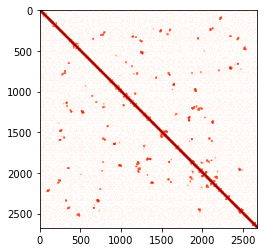

In [6]:
from matplotlib.colors import LogNorm, SymLogNorm
import matplotlib.pyplot as plt

plt.imshow(hic,cmap='Reds',norm=LogNorm(vmin=1e-8, vmax=1),)

In [10]:
2676/(8*30**3)

0.012388888888888889